In [230]:
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score

data = pd.read_csv(r"alerts-data.csv")

X = data["description"].fillna('0')
y = data[["kpi"]]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train)
print(y_train)

8672    Uplink status changed
1354                        0
5229                        0
3985                        0
1794                        0
                ...          
5734                        0
5191                        0
5390                        0
860                         0
7270                        0
Name: description, Length: 7750, dtype: object
                        kpi
8672  Uplink Status Changed
1354             BGP Change
5229             BGP Change
3985             BGP Change
1794             BGP Change
...                     ...
5734             BGP Change
5191             BGP Change
5390             BGP Change
860              BGP Change
7270             BGP Change

[7750 rows x 1 columns]


In [243]:
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1,2))
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

tfidf_vectorizer.get_feature_names_out()
rf_model = RandomForestClassifier()
rf_model.fit(X_train_tfidf,y_train)


C:\Users\10725918\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier()

In [244]:
predictions = rf_model.predict(X_test_tfidf)
predictions

array(['BGP Change', 'BGP Change', 'BGP Change', ...,
       'Client IP Conflict Detected', 'BGP Change', 'BGP Change'],
      dtype=object)

In [245]:
accuracy = accuracy_score(y_test,predictions)
accuracy

0.9917440660474717

<Axes: >

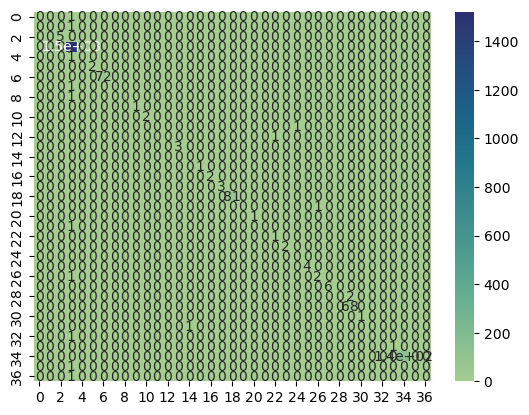

In [246]:
import matplotlib.pyplot as plot
import seaborn as sns
from sklearn.metrics import confusion_matrix


cmatrix  = confusion_matrix(y_test,predictions)
# cmatrix

sns.heatmap(cmatrix, annot=True, cmap="crest")

In [247]:
c_matrix = classification_report(y_test,predictions)
print(c_matrix)

                                                              precision    recall  f1-score   support

                        AD Site Availability Health Degraded       0.00      0.00      0.00         1
                         AD Site Performance Health Degraded       0.00      0.00      0.00         1
                                        Access Points Status       1.00      1.00      1.00         5
                                                  BGP Change       0.99      1.00      1.00      1522
                                      BizTalk Service Status       0.00      0.00      0.00         1
                                               CTS Node Down       1.00      1.00      1.00         2
                                 Client IP Conflict Detected       1.00      1.00      1.00        72
                                   Cluster Node Availability       0.00      0.00      0.00         1
                                    Cluster Service Shutdown       0.00      0.00

C:\Users\10725918\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\10725918\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\10725918\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\107